In [59]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Wine data set is available with sklearn library. Using it to avoid portability issues. 
raw_data = datasets.load_wine()
columns = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
dataset = pd.DataFrame(raw_data['data'], columns = columns)

In [3]:
print('data.shape\t',raw_data['data'].shape,
      '\ntarget.shape \t',raw_data['target'].shape)

data.shape	 (178, 13) 
target.shape 	 (178,)


In [4]:
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data['target']=raw_data['target']
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [5]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


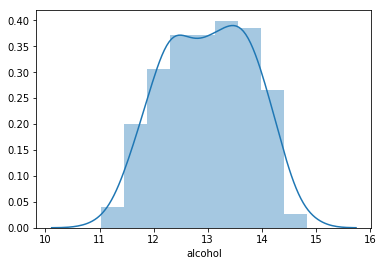

In [6]:
#What is the distrbution of alcohol content among all of the wines?
sns.distplot(data['alcohol'])

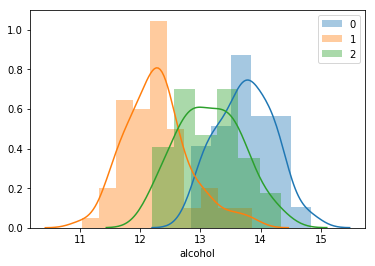

In [7]:
for i in data.target.unique():
    sns.distplot(data['alcohol'][data.target==i],label='{}'.format(i))

plt.legend()

#### Interestingly, the three classes seem to naturally separate as low/mid/high alcohol distrubtions. What are the distributions of the classes for the rest of the features? We'll use Seaborn's .kdeplot() method so we can cleanly distinguish each class. However, note that this scales the y-axis so that the integral under each curve is 1.

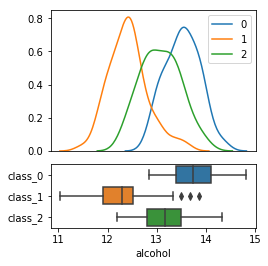

In [8]:
import matplotlib.gridspec as gridspec

feature = 'alcohol'
#sns.boxplot(data=data,x=data.target,y=data[feature])
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


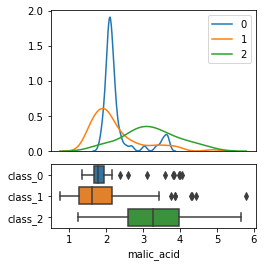

In [9]:
import matplotlib.gridspec as gridspec

feature = 'malic_acid'
#sns.boxplot(data=data,x=data.target,y=data[feature])
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


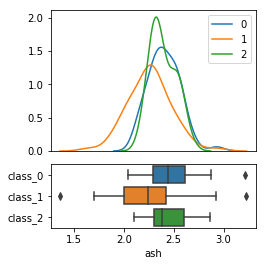

In [10]:
import matplotlib.gridspec as gridspec

feature = 'ash'
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


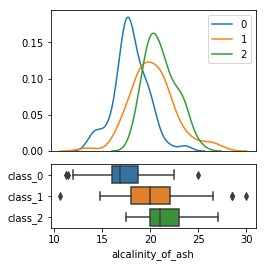

In [11]:
import matplotlib.gridspec as gridspec

feature = 'alcalinity_of_ash'
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


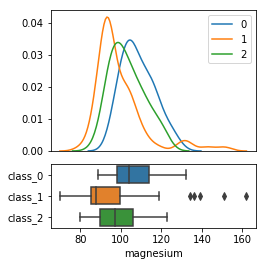

In [12]:
import matplotlib.gridspec as gridspec

feature = 'magnesium'
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


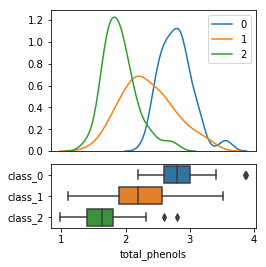

In [13]:
import matplotlib.gridspec as gridspec

feature = 'total_phenols'
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


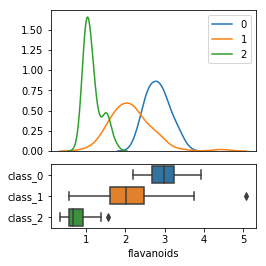

In [14]:
import matplotlib.gridspec as gridspec

feature = 'flavanoids'
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


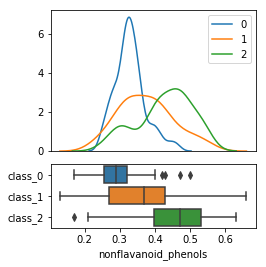

In [15]:
import matplotlib.gridspec as gridspec

feature = 'nonflavanoid_phenols'
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


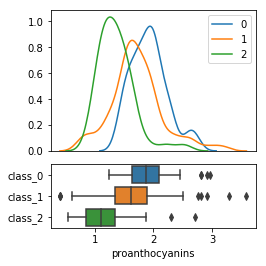

In [16]:
import matplotlib.gridspec as gridspec

feature = 'proanthocyanins'
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


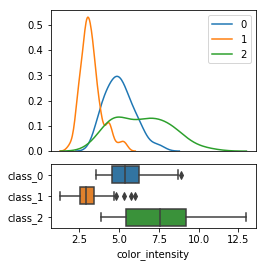

In [17]:
import matplotlib.gridspec as gridspec

feature = 'color_intensity'
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


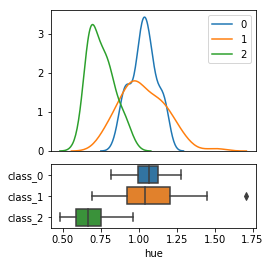

In [18]:
import matplotlib.gridspec as gridspec

feature = 'hue'
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


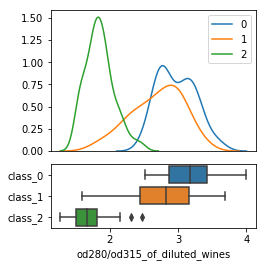

In [19]:
import matplotlib.gridspec as gridspec

feature = 'od280/od315_of_diluted_wines'
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


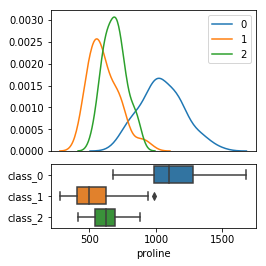

In [20]:
import matplotlib.gridspec as gridspec

feature = 'proline'
gs1 = gridspec.GridSpec(3,1)
ax1 = plt.subplot(gs1[:-1])
ax2 = plt.subplot(gs1[-1])
gs1.update(right=0.60)
sns.boxplot(x=feature,y='class',data=data,ax=ax2)
sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
ax2.yaxis.label.set_visible(False)
ax1.xaxis.set_visible(False)
plt.show()


#### For some of the features such as flavanoids and total phenols, it is clear the class distributions have quite different means. Thus we could expect that even simple models may be able to distinguish the wines...

### Data Split
In order to effectively train and test our model, we need to separate the data into a training set which we will feed to our model along the the training labels. Then after we have trained the model, we will test it on the 'test' data, so that we can gauge the real-world applicability of the model.

We want to train on enough data that our model can make good predictions but we also need enough test data to determine if we've overfit the model. We'll use 20% of the data for testing.

In [25]:
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = \
    train_test_split(raw_data['data'],raw_data['target'],
                     test_size=0.2)
print(len(data_train),' samples in training data\n',
      len(data_test),' samples in test data\n', )

142  samples in training data
 36  samples in test data



### Model selection/validation
There are many classifcation algorithms to choose through, we will use few of them and compare the performance.

we can just take a brute force approach where we test all of them, and keep model that has the highest cross-validation score.

In [26]:
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score

In [27]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.6, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [28]:
train_split, test_split = train_test_split(data, test_size=0.2, stratify=data['target'])

In [29]:
print(train_split['target'].value_counts())
print(test_split['target'].value_counts())

1    57
0    47
2    38
Name: target, dtype: int64
1    14
0    12
2    10
Name: target, dtype: int64


In [30]:
X_train = train_split.drop('target', axis=1).drop('class', axis=1)
Y_train = train_split['target']

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=20000)
estimator = logreg.fit(X_train, Y_train)

In [32]:
y_pred= logreg.predict(test_split.drop('target', axis=1).drop('class', axis=1))

In [33]:
y_a = test_split['target']

In [34]:
x_test=test_split.drop('target', axis=1).drop('class', axis=1)
logreg.score(x_test,y_pred)

1.0

In [35]:
logreg.score(X_train,Y_train)

1.0

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_a, y_pred))

[[12  0  0]
 [ 1 13  0]
 [ 0  1  9]]


In [37]:
from sklearn.metrics import f1_score
print(f1_score(y_a, y_pred, average="macro"))


0.9453132832080202


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

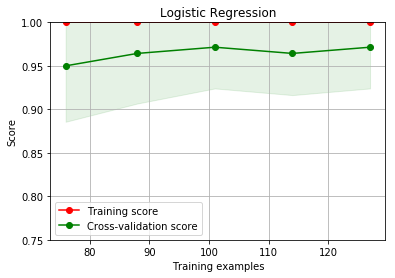

In [38]:
plot_learning_curve(estimator, 'Logistic Regression', X_train, Y_train,ylim=(0.75,1.0),cv=10)

### KNeighours Clasification

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [40]:
estimator = knn.fit(X_train, Y_train)

In [41]:
y_pred= knn.predict(test_split.drop('target', axis=1).drop('class', axis=1))

In [42]:
print(classification_report(y_a, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.82      0.64      0.72        14
           2       0.57      0.80      0.67        10

    accuracy                           0.75        36
   macro avg       0.77      0.76      0.75        36
weighted avg       0.78      0.75      0.76        36



In [43]:
print(confusion_matrix(y_a, y_pred))

[[10  0  2]
 [ 1  9  4]
 [ 0  2  8]]


In [44]:
y_a

150    2
134    2
141    2
114    1
82     1
113    1
47     0
1      0
101    1
147    2
80     1
69     1
138    2
81     1
63     1
77     1
85     1
5      0
40     0
139    2
2      0
11     0
57     0
56     0
42     0
39     0
87     1
161    2
170    2
172    2
86     1
73     1
45     0
21     0
64     1
140    2
Name: target, dtype: int32

In [45]:
y_pred

array([2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 1, 2])

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

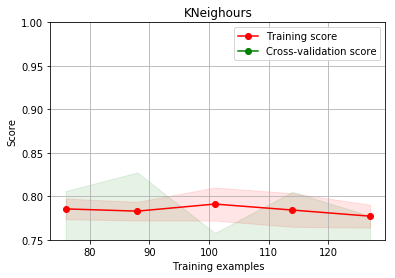

In [46]:
plot_learning_curve(estimator, 'KNeighours', X_train, Y_train,ylim=(0.75,1.0),cv=10)

### Decision Tree

In [47]:
from sklearn import tree

In [48]:
dt = tree.DecisionTreeClassifier()

In [49]:
estimator = dt.fit(X_train, Y_train)

In [50]:
y_pred= dt.predict(test_split.drop('target', axis=1).drop('class', axis=1))

In [51]:
print(classification_report(y_a, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.76      0.93      0.84        14
           2       1.00      0.60      0.75        10

    accuracy                           0.86        36
   macro avg       0.90      0.84      0.85        36
weighted avg       0.88      0.86      0.85        36



In [52]:
print(confusion_matrix(y_a, y_pred))

[[12  0  0]
 [ 1 13  0]
 [ 0  4  6]]


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

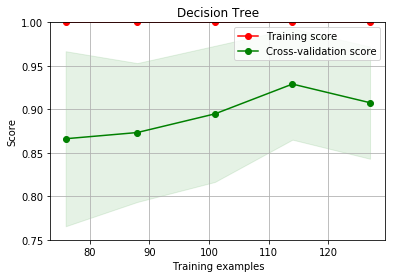

In [53]:
plot_learning_curve(estimator, 'Decision Tree', X_train, Y_train,ylim=(0.75,1.0),cv=10)

### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier()

In [56]:
estimator = rfc.fit(X_train, Y_train)

In [57]:
y_pred= rfc.predict(test_split.drop('target', axis=1).drop('class', axis=1))
print(classification_report(y_a, y_pred))
print(confusion_matrix(y_a, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

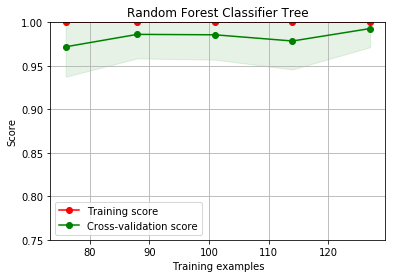

In [58]:
plot_learning_curve(estimator, 'Random Forest Classifier Tree', X_train, Y_train,ylim=(0.75,1.0),cv=10)